# Lab Section 4: Working with noise in the ANN

### Part 1: Handling Noise

Let's create a data set with increased noise and then take a look at the weights and the loss functions that come out of the gradient descent trained network. In the next cell, we provide the model as written in the walkthrough/lecture:

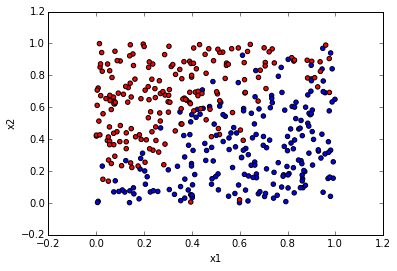

In [13]:
__author__ = 'mike.bowles'
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
#synthesize a 2-d classification data set

#define lists to hold some data.  X1 and X2 will be attributes (features) and Y will be labels.  
X1 = []
X2 = []
Y = []
noiseSd = 0.2
numRows = 400
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]
plt.scatter(X1, X2, c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

(0, 0.2484591542627915, -0.02179919546106531, 0.01724658279168044)
(100, 0.1610599720186253, -1.5339457295685845, 1.4150075479445205)
(200, 0.13284107805224796, -2.3773864217193386, 2.2383290536197333)
(300, 0.12007642882503662, -2.950332197818091, 2.790955393496237)
(400, 0.11287504832663253, -3.382953994542715, 3.2051240227644135)
(500, 0.10825473358152814, -3.730499541381638, 3.536344124178591)
(600, 0.10503857629244408, -4.020984533068469, 3.812378938956408)
(700, 0.10267145775700115, -4.2704867852405375, 4.049002243973082)
(800, 0.10085745180380822, -4.489078568275598, 4.256022500936457)
(900, 0.09942421846324355, -4.6834903192287864, 4.4399568102508935)
(1000, 0.09826447286793207, -4.858446175825013, 4.605359440235132)
(1100, 0.09730786602864486, -5.017392706428937, 4.755541436800388)
(1200, 0.09650630890040346, -5.162923893762091, 4.892987776566339)
(1300, 0.09582579044162995, -5.297042612318455, 5.019612753929312)
(1400, 0.09524156427076422, -5.421328738491517, 5.13692349435308

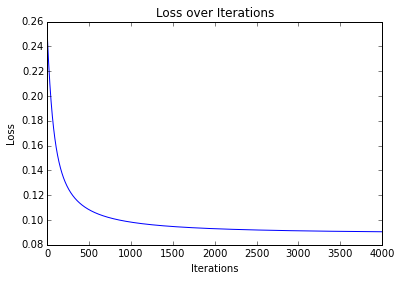

In [14]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Define sigmoid function S()
def S(x):
    return 1.0 / (1.0 + math.exp(-x))

# Define the model
def simpleNeuralNet(x1, x2, w1, w2):
    return S(w1 * x1 + w2 * x2)

# Define the Loss
def L(X1, X2, Y, w1, w2):
    # define error for each point in an array
    sqErr = [(yy - simpleNeuralNet(xx1, xx2, w1, w2)) ** 2 for (xx1, xx2, yy) in zip(X1, X2, Y)]
    M = float(len(X1)) #calculate the cardinality
    # applying the formula given above
    meanSqErr = (1.0 / M) * sum(sqErr)
    return meanSqErr


# Define the gradient
def gradL(X1, X2, Y, w1, w2):
    M = float(len(X1))
    arg = [w1 * x1 + w2 * x2 for (x1, x2) in zip(X1, X2)]
    summand1 = [(yy - S(a)) * S(a) * S(-a) * xx1 for (yy, a, xx1) in zip(Y, arg, X1)]
    summand2 = [(yy - S(a)) * S(a) * S(-a) * xx2 for (yy, a, xx2) in zip(Y, arg, X2)]
    grad1 = (-2.0 / M) * sum(summand1)
    grad2 = (-2.0 / M) * sum(summand2)
    return [grad1, grad2]

#Initialize weights
w1 = 0.0
w2 = 0.0

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_list = []
w2_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1, X2, Y, w1, w2)
    w1 -= lr * grad[0]
    w2 -= lr * grad[1]
    loss.append(L(X1, X2, Y, w1, w2))
    if not iStep % 100:
        print(iStep, L(X1, X2, Y, w1, w2), w1, w2)
        w1_list.append(w1)
        w2_list.append(w2)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

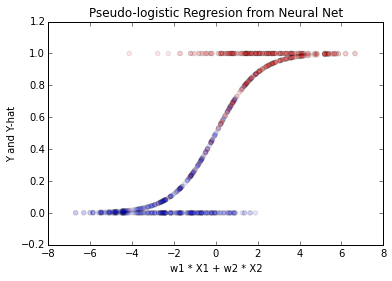

In [17]:
# here is a way to plot the output

x_axis = [w1 * x1 + w2 * x2 for x1, x2 in zip(X1, X2)]
y_hat = [S(x) for x in x_axis]

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]

plt.scatter(x_axis, Y, c=colors, alpha=0.1) # true points
plt.scatter(x_axis, y_hat, c=colors, alpha=0.1) # raw predictions from the neural net
plt.xlabel('w1 * X1 + w2 * X2')
plt.ylabel('Y and Y-hat')
plt.title('Pseudo-logistic Regresion from Neural Net');

In the next cell, we provide a noisy dataset for you to work with.

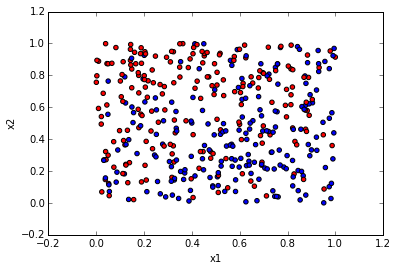

In [9]:
X1_noisy = [] # renaming variable
X2_noisy = [] # renaming variable
Y_noisy = [] # renaming variable
noiseSd = 0.7 # THE ONLY THING THAT'S REALLY CHANGED
numRows = 400
for i in range(numRows):
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1_noisy.append(x1); X2_noisy.append(x2); Y_noisy.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors_noisy = [colorMap[c] for c in Y_noisy] # renaming variable
plt.scatter(X1_noisy, X2_noisy, c=colors_noisy)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

(0, 0.24951290260459158, -0.008992144551428395, 0.01278610080558761)
(100, 0.22125165754882656, -0.8092336891871555, 0.8695252700101441)
(200, 0.2118478737065301, -1.3035223686049917, 1.335660891022133)
(300, 0.20814947029663358, -1.6141988592799599, 1.6290659977050521)
(400, 0.20646675219559374, -1.8237619822160047, 1.8277077130839101)
(500, 0.20562005220412652, -1.9723840518073006, 1.9689550364573343)
(600, 0.20516359953844454, -2.0814795776678077, 2.07283311261232)
(700, 0.2049052927224601, -2.1635285403912765, 2.151066903648813)
(800, 0.20475389254536705, -2.226331153710352, 2.211011955026497)
(900, 0.20466281415633766, -2.27503306690176, 2.257535045573669)
(1000, 0.204606937106558, -2.3131740791959112, 2.293992210124075)
(1100, 0.20457213653746692, -2.343270665212157, 2.322773958543202)
(1200, 0.20455020824830264, -2.3671589286051202, 2.345627268021466)
(1300, 0.20453626428553423, -2.386206574981161, 2.3638551448764598)
(1400, 0.2045273334720513, -2.4014494240654556, 2.37844545413

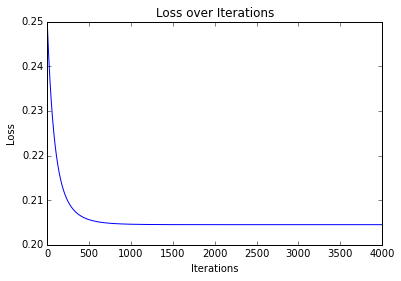

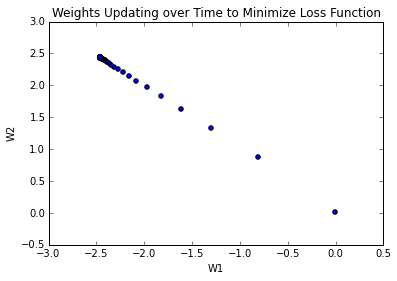

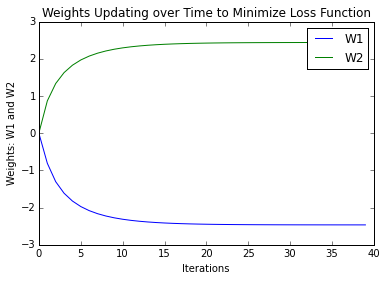

In [16]:
# This part is completely identical except renamed variables

w1_noisy = 0.0 # renamed
w2_noisy = 0.0 # renamed

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_noisy_list = []
w2_noisy_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy)
    w1_noisy -= lr * grad[0]
    w2_noisy -= lr * grad[1]
    loss.append(L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy))
    if not iStep % 100:
        print(iStep, L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy), w1_noisy, w2_noisy)
        w1_noisy_list.append(w1_noisy)
        w2_noisy_list.append(w2_noisy)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

# Let's see how the weights update over iterations

plt.scatter(w1_noisy_list, w2_noisy_list)
plt.xlabel("W1")
plt.ylabel("W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.show()

plt.plot(w1_noisy_list, label="W1")
plt.plot(w2_noisy_list, label="W2")
plt.xlabel("Iterations")
plt.ylabel("Weights: W1 and W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.legend()
plt.show()



Study the above figures and outputs. Compare them with the lectures and try to reach a consensus as to what is happening with our little neural net when it tries to handle the noisy data. Make a plot like that above labeled "Pseudo-logistic regression" for the **noisy data**. 

## (Group) Exercises

A) What happened?

B) The model above is pretty simple.  To make it somewhat more realistic add a bias term to the basic network equation.  In the previous example the network equation was :

$$y_n = S(w1 * x1_n + w2 * x2_n)$$

Add a bias/intercept term:

$$y_n = S(w1 * x1_n + w2 * x2_n + b)$$ 

Now repeat the steps above with this new network architecture.  Use the code above as a template and write the code that:

     1.  Defines the network architecture
     2.  Generates the loss function
     3.  Generates the gradient wrt to the three network parameters
     4.  Use gradient descent to find parameters that minimize loss

C) Make sure to plot your results!

D) Do you get any performance improvement?

